## Deep Learning Test

# MCQ Question

1.What does mlp stands for?

b)Multilayer perceptron

2.What type of neural network is an MLP?

b) Feedforward Neural Network

3.What is the purpose of the activation function in MLP?

b) To introduce non-linearity

4.Which activation function is commonly used in MLP hidden layers?

a)ReLU

5.What does the input layer of an MLP do?

c) Accepts raw input data




6.Which algorithm is typically used to train an MLP?

a) Gradient Descent

7.What are the weights in an MLP?

b) Connections between neurons

8.What is the output layer of an MLP used for?

c) Providing final predictions

9.What type of data does an MLP process?

a) Sequential data

10.What is the main drawback of MLPs?

a)overfitting






11.What is a neuron in an MLP?

b) A computational unit performing weighted sums and activation

12.How are the weights in an MLP initialized?

a)randomly

13.How is overfitting commonly prevented in MLPs?

c) By applying regularization (e.g., dropout, L2 norm)

14.What is the function of hidden layers in an MLP?

b) To learn features from the input data

15.How does the ReLU activation function work?

b) Outputs the same value as the input if it's positive; otherwise 0




16.What does the Softmax function output?

b) Probabilities summing to 1
17.What is the purpose of learning rate in MLP training?

b) To adjust the step size for weight updates

18.How is the loss function used in MLP training?

b) It measures the difference between predicted and true outputs

19.Which loss function is commonly used for classification problems in MLPs?

b) Cross-Entropy Loss

20.What is the main difference between MLP and a single-layer perceptron?

a) MLP has multiple layers of neurons



# Practical Question

## Question: Build, Save, and Reload a Neural Network Model with MNIST Dataset

### Background:

The MNIST dataset is a collection of handwritten digit images, where each image is 28x28 pixels. It has 10 classes (digits from 0 to 9). Your task is to use this dataset to build, train, and test a neural network model with Keras.

### Instructions:

##### Load the MNIST Dataset

Use TensorFlow/Keras to load the MNIST dataset. Preprocess the data by normalizing the pixel values to be between 0 and 1.

##### Build a Neural Network Model

##### Create a Multi-Layer Perceptron (MLP) model with the following:


    1- An input layer that accepts 28x28=784 features (flatten the image).

    2- At least 3 dense (fully connected) layers with activation functions of your choice.

    3- An output layer with 10 neurons (one for each digit class) and a softmax activation function.

    4- Compile and Train the Model

    5- Use an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and metric (e.g., accuracy).

    6- Train the model on the MNIST training set for a sufficient number of epochs.
    
    7- Save the Model

    8- Save the trained model to a file using Keras' save() method.

    9- Reload the Model

    10- Load the saved model from the file using Keras' load_model() method.
    
    11- Make Predictions

    12- Use the reloaded model to predict the class of any one sample from the MNIST test set.

    13- Display the input image and the predicted class in your output.

#### Deliverables:

    A Python script (.py or .ipynb file) containing all the steps mentioned above.

    Clear and concise comments explaining each step in the code.
#### Bonus:

Visualize a few predictions (e.g., show 5 images from the test set with their predicted labels).
Good luck!

In [4]:
#Importing necessary libraries for data manipulation, visualization, and model building

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils import to_categorical
from keras import utils

import warnings
warnings.filterwarnings('ignore')

In [85]:
#downloading the mnist dataset

In [86]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [87]:
#checking shape of y_test data
print(y_test.shape)

(10000,)


In [88]:
#checking shape for x_train data
print(x_train.shape)

(60000, 28, 28)


In [89]:
#visualising the first 10 images from the training dataset

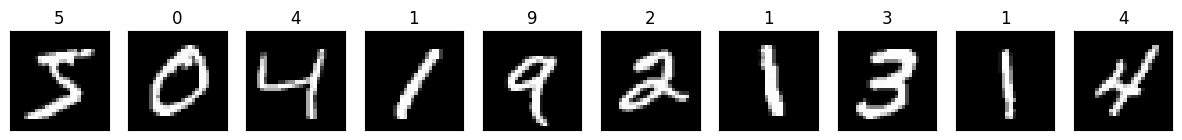

In [90]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(15,5))
# Loop through the first 10 images
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [91]:
#lets convert the labels into categorical format

In [92]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test)

In [93]:
print(y_train.shape)

(60000, 10)


In [94]:
print(y_test.shape)

(10000, 10)


In [95]:
#we are selecting our model
model=Sequential()

In [96]:
#applying flatten to convert our images into 1dimensional array
model.add(Flatten(input_shape=(28,28)))

In [97]:
#adding  3 fully connected layers
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

In [98]:
#adding output layer
model.add(Dense(10,activation='softmax'))

In [99]:
#now we are checking the summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

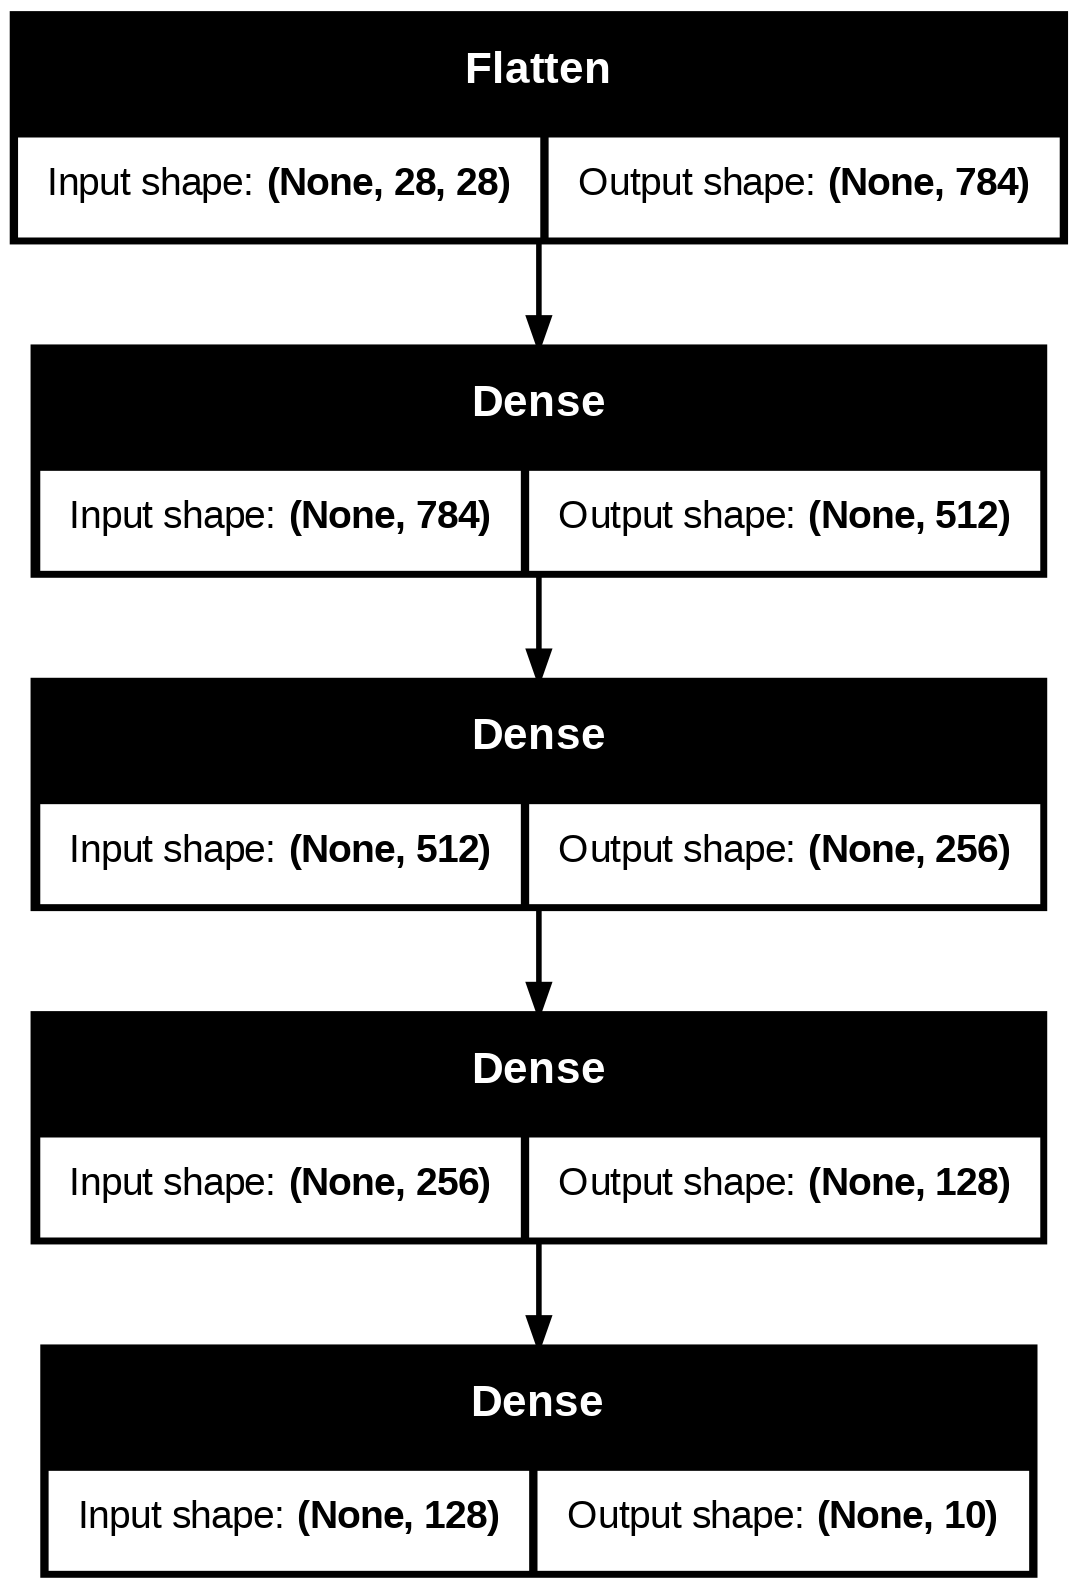

In [100]:
#going to visualize the arichtecture
utils.plot_model(model,show_shapes=True)

In [105]:
#we are compiling our model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
#training our compiled model
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9423 - loss: 0.1822 - val_accuracy: 0.9432 - val_loss: 0.1773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9432 - loss: 0.1788 - val_accuracy: 0.9462 - val_loss: 0.1778
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9506 - loss: 0.1556 - val_accuracy: 0.9474 - val_loss: 0.1671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9517 - loss: 0.1497 - val_accuracy: 0.9446 - val_loss: 0.1799
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9525 - loss: 0.1499 - val_accuracy: 0.9455 - val_loss: 0.1690


In [107]:
#saving our model
model.save('dl_mnist.h5')

In [109]:
#reloading the model
from keras.models import load_model
load_model=load_model('dl_mnist.h5')

In [110]:
print(history.history)

{'accuracy': [0.942799985408783, 0.9458333253860474, 0.9495499730110168, 0.9507333040237427, 0.9522333145141602], 'loss': [0.1814662367105484, 0.1719360649585724, 0.15725140273571014, 0.1529519110918045, 0.15013618767261505], 'val_accuracy': [0.9431999921798706, 0.9462000131607056, 0.9473999738693237, 0.944599986076355, 0.9455000162124634], 'val_loss': [0.1773407757282257, 0.1777963936328888, 0.16713054478168488, 0.17994841933250427, 0.16898679733276367]}


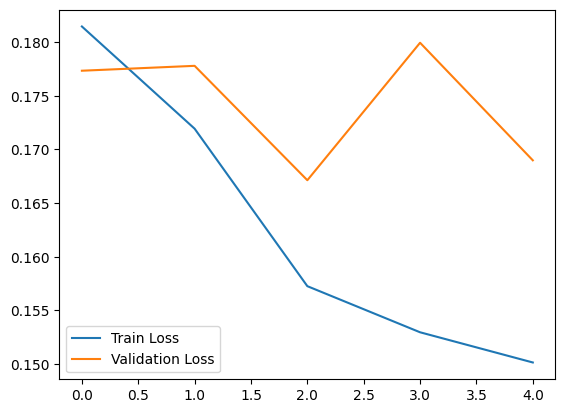

In [111]:
#plotting the loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

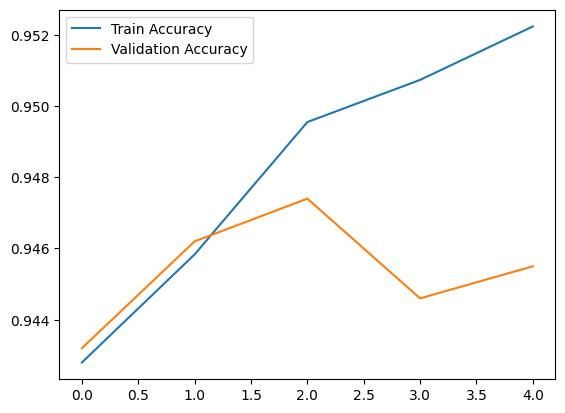

In [112]:
#plotting the accuarcy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

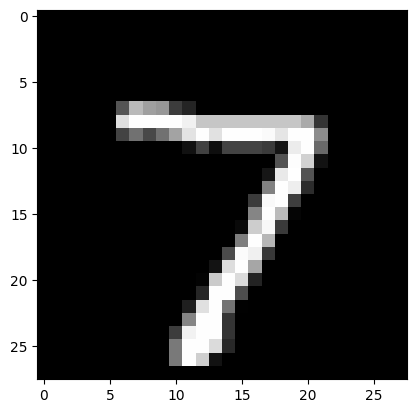

In [114]:
# Displaying the first test image from the dataset
plt.imshow(x_test[0], cmap='gray')

In [115]:
# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[0], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7


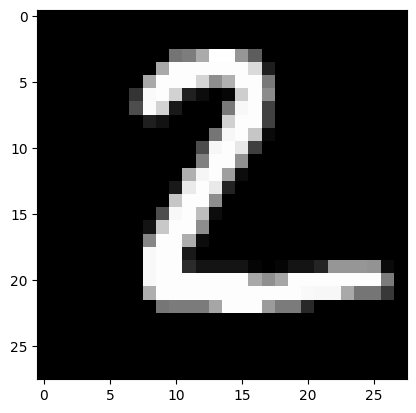

In [116]:
# Displaying the second test image from the dataset
plt.imshow(x_test[1], cmap='gray')

In [121]:
# Reshaping the second test image to match the model's input shape
x = np.reshape(x_test[1], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2


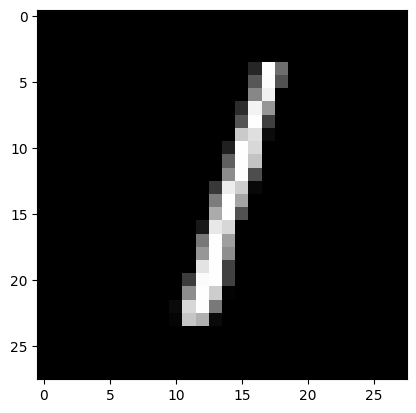

In [122]:
# Displaying the third test image from the dataset
plt.imshow(x_test[2], cmap='gray')

In [123]:
# Reshaping the third test image to match the model's input shape
x = np.reshape(x_test[2], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1


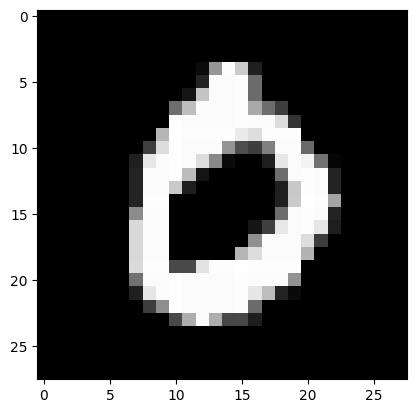

In [124]:
# Displaying the fourth test image from the dataset
plt.imshow(x_test[3], cmap='gray')

In [128]:
# Reshaping the fourth test image to match the model's input shape
x = np.reshape(x_test[3], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0


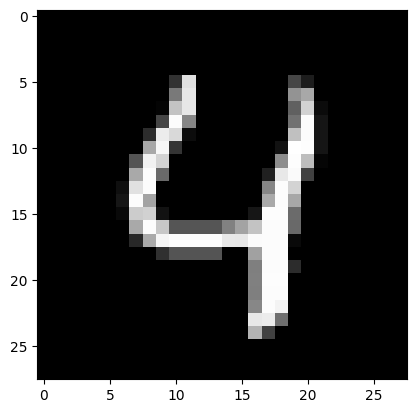

In [125]:
# Displaying the fifth test image from the dataset
plt.imshow(x_test[4], cmap='gray')

In [129]:
# Reshaping the fifth test image to match the model's input shape
x = np.reshape(x_test[4], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4
